# Insights BeautifulSoup 



In [ ]:
#__version__:0.0.1
#__release__: ??
#UNESP-FEIS
#@Arthur_Chabole

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

## Abrindo a URL com request


In [12]:
# 1º modo
request = requests.get('https://lista.mercadolivre.com.br/carros#D[A:carros]')
request.encoding = 'utf-8'

#Criando o objeto soup
soup = BeautifulSoup(request.text, 'html.parser')

In [100]:
# 2º modo
#response = urlopen('https://lista.mercadolivre.com.br/carros#D[A:carros]')
#html = response.read()

html = urlopen('https://lista.mercadolivre.com.br/carros#D[A:carros]').read()

soup = BeautifulSoup(html, 'html.parser')

In [118]:
#print(soup.prettify())

### Pegando um elemento específico da página  

In [122]:
all_price = soup.find_all(class_='price-tag-fraction') #mostra os código html

#all_price

In [102]:
#convertendo em texto
prices = []
for price in all_price:
    prices.append(float(price.get_text()))

In [103]:
#Construindo um dataframe com 1 coluna
price_df = pd.DataFrame()

price_df['Preços'] = prices

### Construindo um DataFrame com a página

In [108]:
#Pega todas as classes com esse nome
blocos = soup.find_all(class_='ui-search-layout ui-search-layout--grid')

In [109]:
tabela = []
for bloco in blocos:
    tabela.append({
        'Modelo':(bloco.find(class_="ui-search-item__title ui-search-item__group__element")).text,
        'Preços':float((bloco.find(class_="price-tag-fraction")).text),
        'Local':(bloco.find(class_="ui-search-item__group__element ui-search-item__location")).text,
        'Ano':float((bloco.find_all(class_="ui-search-card-attributes__attribute")[0]).text),
        'Km':((bloco.find_all(class_="ui-search-card-attributes__attribute")[1]).text) #Problema com isso
    })

In [110]:
df = pd.DataFrame(data=tabela)

In [111]:
df.head(10)

,Modelo,Preços,Local,Ano,Km
0,Jac J3 1.4 Turin 16v Gasolina 4p Manual,20.900,São Paulo,2012.0,100.000 Km
1,Chevrolet Onix 1.0 Lt 5p,63.870,São Paulo,2021.0,0 Km
2,Mercedes-benz Sprinter Furgão 2.2 Cdi 416 Long...,212.900,São Paulo,2021.0,0 Km
3,Fiat Fiorino 1.4 Hard Working Flex 4p,79.970,São Paulo,2021.0,0 Km
4,Honda Fit Fit Lx 1.4 (flex),27.499,São Paulo,2008.0,158.600 Km
5,Bmw X1 X1 2.0 Sdrive18i Top (aut),76.900,São Paulo,2014.0,66.500 Km
6,Renault Master 2.3 Extra L3h2 5p,167.900,São Paulo,2021.0,0 Km
7,Jac J2 1.4 16v Gasolina 4p Manual,20.900,São Paulo,2013.0,81.000 Km
8,Mitsubishi Asx 2.0 4x4 Awd 16v Gasolina 4p Aut...,69.900,São Paulo,2015.0,65.000 Km
9,Jeep Renegade Renegade Longitude 1.8 4x2 Flex ...,69.900,São Paulo,2016.0,40.791 Km


In [112]:
print(df['Preços'].mean(), df['Preços'].std())

89.957375 61.65913283623657


### Carregando as informações de todas as páginas 

In [140]:
#Encontarndos todos os links 
links = soup.find(class_="ui-search-pagination andes-pagination")

#links
'''Testar funções lambda'''

In [46]:
#separando os links em texto pela tag['href']
all_links = []
for link in links:
    all_links.append(link.find(class_='andes-pagination__link ui-search-link')['href'])
    
all_links

['https://lista.mercadolivre.com.br/veiculos/carros-caminhonetes/carros',
 'https://lista.mercadolivre.com.br/veiculos/carros-caminhonetes/carros_Desde_49',
 'https://lista.mercadolivre.com.br/veiculos/carros-caminhonetes/carros_Desde_97',
 'https://lista.mercadolivre.com.br/veiculos/carros-caminhonetes/carros_Desde_145',
 'https://lista.mercadolivre.com.br/veiculos/carros-caminhonetes/carros_Desde_193',
 'https://lista.mercadolivre.com.br/veiculos/carros-caminhonetes/carros_Desde_241',
 'https://lista.mercadolivre.com.br/veiculos/carros-caminhonetes/carros_Desde_289',
 'https://lista.mercadolivre.com.br/veiculos/carros-caminhonetes/carros_Desde_337',
 'https://lista.mercadolivre.com.br/veiculos/carros-caminhonetes/carros_Desde_385',
 'https://lista.mercadolivre.com.br/veiculos/carros-caminhonetes/carros_Desde_433',
 'https://lista.mercadolivre.com.br/veiculos/carros-caminhonetes/carros_Desde_49']

In [146]:
tabela = []
for link in all_links:
    response = (urlopen(link))
    html = response.read()
    
    soup = BeautifulSoup(html, 'html.parser') #Inst objeto 
    
    blocos = soup.find_all(class_='ui-search-layout ui-search-layout--grid') #Pegando classes específicas
    
    for bloco in blocos:
        tabela.append({
            'Modelo':(bloco.find(class_="ui-search-item__title ui-search-item__group__element")).text,
            'Preços':float((bloco.find(class_="price-tag-fraction")).text),
            'Local':(bloco.find(class_="ui-search-item__group__element ui-search-item__location")).text,
            'Ano':float((bloco.find_all(class_="ui-search-card-attributes__attribute")[0]).text),
            'Km':((bloco.find_all(class_="ui-search-card-attributes__attribute")[1]).text) #Problema com isso
        })

### Criando o DataFrame com o dicionário

In [147]:
pag_df = pd.DataFrame(data=tabela)

In [142]:
#Salvando o DataFrame em um arquivo excel
pag_df.to_excel("D:/Arquivos Perssoais/PythonProjects/Projetos de automação/Mercado_livre.xlsx",sheet_name='Tabela') 

'''Gravando em mais de uma planilha no mesmo arquivo'''
df2 = df1.copy()
with pd.ExcelWriter('output.xlsx') as writer:  
    df1.to_excel(writer, sheet_name='Sheet_name_1')
    df2.to_excel(writer, sheet_name='Sheet_name_2')

In [148]:
pag_df.tail()

,Modelo,Preços,Local,Ano,Km
171,Renault Master Chassi,153.90,São Paulo,2022.0,0 Km
172,Fiat Uno 1.3 Way Flex 5p,46.90,São Paulo,2018.0,90.000 Km
173,Fiat Idea 1.4 Attractive Flex 5p,37.99,São Paulo,2015.0,59.000 Km
174,Hyundai Santa Fe 2.7 5l Aut. 5p,34.80,São Paulo,2008.0,100.000 Km
175,Toyota Corolla 1.8 16v Se-g Aut. 4p,44.99,São Paulo,2006.0,62.980 Km


In [131]:
pag_df.describe()

,Preços,Ano
count,176.000000,176.000000
mean,76.107114,2014.852273
std,57.438792,4.977756
min,16.900000,1996.000000
25%,36.672500,2012.000000
50%,53.430000,2015.000000
75%,88.497500,2019.000000
max,275.000000,2022.000000


In [132]:
pag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Modelo  176 non-null    object 
 1   Preços  176 non-null    float64
 2   Local   176 non-null    object 
 3   Ano     176 non-null    float64
 4   Km      176 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.0+ KB


<AxesSubplot:xlabel='Local', ylabel='Preços'>

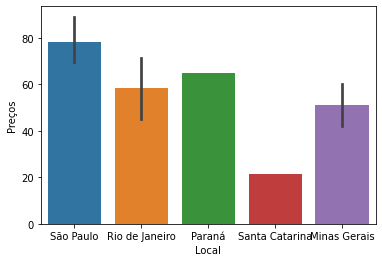

In [134]:
sns.barplot(x='Local', y='Preços', data=pag_df)

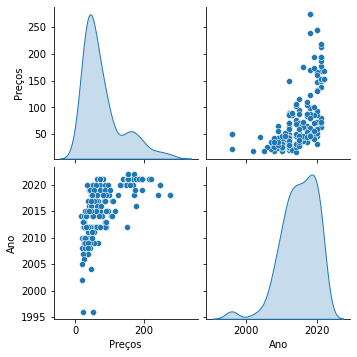

In [130]:
sns.pairplot(pag_df, diag_kind='kde')

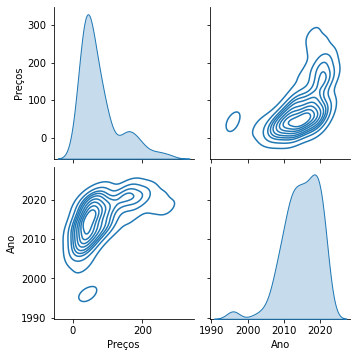

In [124]:
sns.pairplot(pag_df, kind='kde', diag_kind='kde')

C:\Users\arthu\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\arthu\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\arthu\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\arthu\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


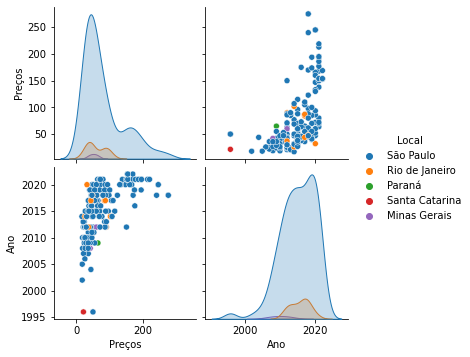

In [129]:
sns.pairplot(pag_df, kind='scatter', diag_kind='kde', hue='Local')